In [1]:
import pandas as pd
Results_Unlearn  = './Model_Unlearn_Prediction_Results_Top5.csv'
# test = '/home/yupaporn/codes/USAI/Testdf.csv'
Results_Unlearn = pd.read_csv (Results_Unlearn)

Results_Unlearn.head()

,Path Crop,Sub_class_New,Sub_Position_Label,Unlearn_pred_15AB_top1,Unlearn_pred_15AB_top2,Unlearn_pred_15AB_top3,Unlearn_pred_15AB_top4,Unlearn_pred_15AB_top5,Unlearn_prob_15AB_all
0,/media/HDD/USAI/ABnormal01/1 ABNORMAL/cropped/...,AB01,P1,Normal,AB02,AB02,AB02,AB02,"['Normal', 'AB02', 'AB02', 'AB02', 'AB02']"
1,/media/HDD/USAI/ABnormal01/1 ABNORMAL/cropped/...,AB01,P2,AB01,Normal,Normal,Normal,Normal,"['AB01', 'Normal', 'Normal', 'Normal', 'Normal']"
2,/media/HDD/USAI/ABnormal01/1 ABNORMAL/cropped/...,AB01,P4,AB01,AB02,AB02,AB02,AB02,"['AB01', 'AB02', 'AB02', 'AB02', 'AB02']"
3,/media/HDD/USAI/ABnormal01/1 ABNORMAL/cropped/...,AB01,P6,AB01,AB02,AB02,AB02,AB02,"['AB01', 'AB02', 'AB02', 'AB02', 'AB02']"
4,/media/HDD/USAI/ABnormal01/1 ABNORMAL/cropped/...,AB01,P3,AB02,AB01,AB01,AB01,AB01,"['AB02', 'AB01', 'AB01', 'AB01', 'AB01']"


## Evaluation Top-1

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# =========================
# Ground truth
# =========================
y_true_15AB = Results_Unlearn['Sub_class_New']
# y_true_pos  = Results_Unlearn['Sub_Position_Label']

# =========================
# Top-1 predictions
# =========================
y_pred_15AB = Results_Unlearn['Unlearn_pred_15AB_top1']
# y_pred_pos  = Results_Unlearn['Unlearn_pred_Sub_Position_top1']

# =========================
# 15AB metrics
# =========================
acc_15AB = accuracy_score(y_true_15AB, y_pred_15AB)
prec_15AB = precision_score(y_true_15AB, y_pred_15AB, average='macro', zero_division=0)
rec_15AB = recall_score(y_true_15AB, y_pred_15AB, average='macro', zero_division=0)
f1_15AB = f1_score(y_true_15AB, y_pred_15AB, average='macro', zero_division=0)

# =========================
# Sub-Position metrics
# =========================
# acc_pos = accuracy_score(y_true_pos, y_pred_pos)
# prec_pos = precision_score(y_true_pos, y_pred_pos, average='macro', zero_division=0)
# rec_pos = recall_score(y_true_pos, y_pred_pos, average='macro', zero_division=0)
# f1_pos = f1_score(y_true_pos, y_pred_pos, average='macro', zero_division=0)

# =========================
# Print results
# =========================
print("===== 15AB Classification (Top-1) =====")
print(f"Accuracy : {acc_15AB:.4f}")
print(f"Precision: {prec_15AB:.4f}")
print(f"Recall   : {rec_15AB:.4f}")
print(f"F1-score : {f1_15AB:.4f}")

# print("\n===== Sub-Position Classification (Top-1) =====")
# print(f"Accuracy : {acc_pos:.4f}")
# print(f"Precision: {prec_pos:.4f}")
# print(f"Recall   : {rec_pos:.4f}")
# print(f"F1-score : {f1_pos:.4f}")


===== 15AB Classification (Top-1) =====
Accuracy : 0.8933
Precision: 0.8279
Recall   : 0.7282
F1-score : 0.7668


## Evaluation Top-3

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def topk_metrics(df, gt_col, pred_cols, k):
    y_true = []
    y_pred = []

    for i in range(len(df)):
        gt = df.loc[i, gt_col]
        preds = df.loc[i, pred_cols[:k]].values.tolist()

        if gt in preds:
            y_true.append(1)
            y_pred.append(1)
        else:
            y_true.append(1)
            y_pred.append(0)

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    return acc, prec, rec, f1


### 15AB : Top-3 / Top-5

In [5]:
pred_15AB_columns_top5 = [
    'Unlearn_pred_15AB_top1',
    'Unlearn_pred_15AB_top2',
    'Unlearn_pred_15AB_top3',
    'Unlearn_pred_15AB_top4',
    'Unlearn_pred_15AB_top5'
]

acc3_15AB, prec3_15AB, rec3_15AB, f13_15AB = topk_metrics(
    Results_Unlearn,
    gt_col='Sub_class_New',
    pred_cols=pred_15AB_columns_top5,
    k=3
)

acc5_15AB, prec5_15AB, rec5_15AB, f15_15AB = topk_metrics(
    Results_Unlearn,
    gt_col='Sub_class_New',
    pred_cols=pred_15AB_columns_top5,
    k=5
)


### Sub-Position : Top-3 / Top-5

In [7]:
pred_Sub_Position_columns_top5 = [
    'Unlearn_pred_Sub_Position_top1',
    'Unlearn_pred_Sub_Position_top2',
    'Unlearn_pred_Sub_Position_top3',
    'Unlearn_pred_Sub_Position_top4',
    'Unlearn_pred_Sub_Position_top5'
]

# acc3_pos, prec3_pos, rec3_pos, f13_pos = topk_metrics(
#     Results_Unlearn,
#     gt_col='Sub_Position_Label',
#     pred_cols=pred_Sub_Position_columns_top5,
#     k=3
# )

# acc5_pos, prec5_pos, rec5_pos, f15_pos = topk_metrics(
#     Results_Unlearn,
#     gt_col='Sub_Position_Label',
#     pred_cols=pred_Sub_Position_columns_top5,
#     k=5
# )


In [9]:
print("===== 15AB Classification =====")
print(f"Top-3 | Acc: {acc3_15AB:.4f}  Prec: {prec3_15AB:.4f}  Rec: {rec3_15AB:.4f}  F1: {f13_15AB:.4f}")
print(f"Top-5 | Acc: {acc5_15AB:.4f}  Prec: {prec5_15AB:.4f}  Rec: {rec5_15AB:.4f}  F1: {f15_15AB:.4f}")

# print("\n===== Sub-Position Classification =====")
# print(f"Top-3 | Acc: {acc3_pos:.4f}  Prec: {prec3_pos:.4f}  Rec: {rec3_pos:.4f}  F1: {f13_pos:.4f}")
# print(f"Top-5 | Acc: {acc5_pos:.4f}  Prec: {prec5_pos:.4f}  Rec: {rec5_pos:.4f}  F1: {f15_pos:.4f}")


===== 15AB Classification =====
Top-3 | Acc: 0.9436  Prec: 1.0000  Rec: 0.9436  F1: 0.9710
Top-5 | Acc: 0.9497  Prec: 1.0000  Rec: 0.9497  F1: 0.9742


##  Top-k Confusion Matrix (15×15)

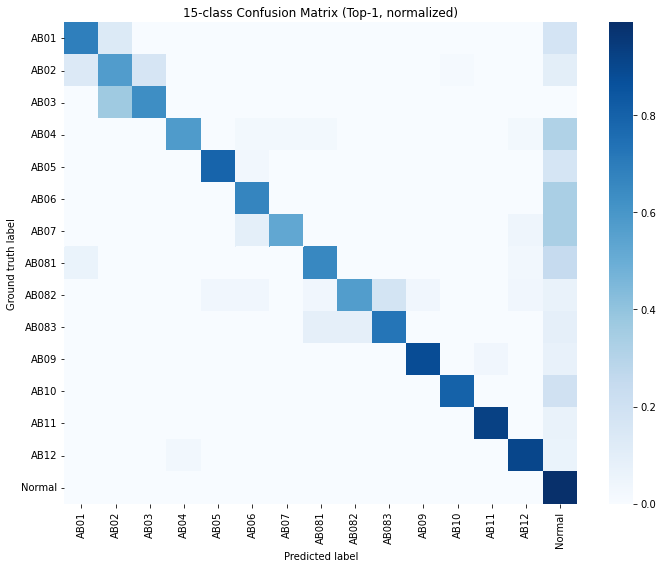

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ground truth & prediction (Top-1)
y_true = Results_Unlearn['Sub_class_New']
y_pred = Results_Unlearn['Unlearn_pred_15AB_top1']

# fix label order (สำคัญมาก)
labels_15AB = sorted(y_true.unique())

cm = confusion_matrix(y_true, y_pred, labels=labels_15AB, normalize='true')

plt.figure(figsize=(10,8))
sns.heatmap(
    cm,
    xticklabels=labels_15AB,
    yticklabels=labels_15AB,
    cmap="Blues",
    annot=False
)
plt.xlabel("Predicted label")
plt.ylabel("Ground truth label")
plt.title("15-class Confusion Matrix (Top-1, normalized)")
plt.tight_layout()
plt.show()


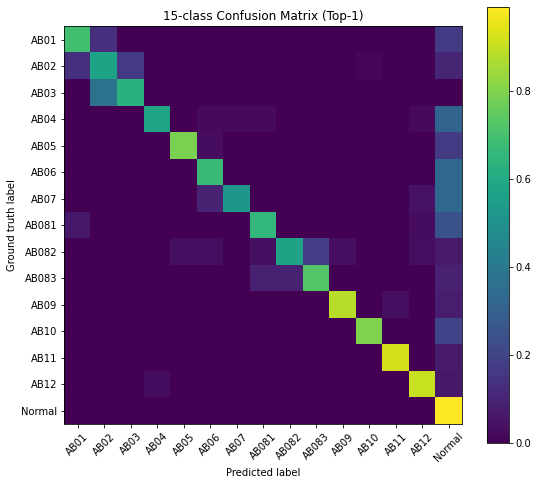

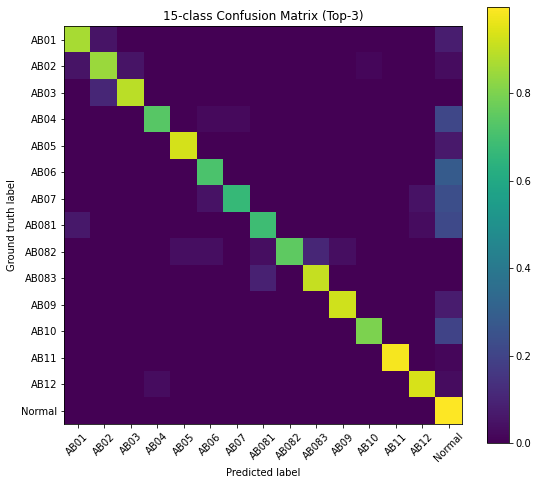

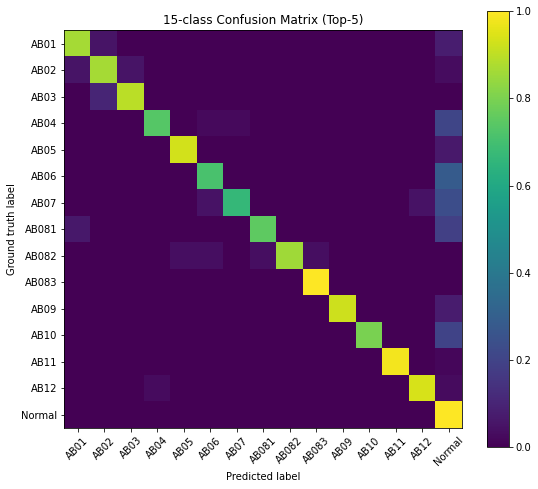

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
class_names = [
    'AB01','AB02','AB03','AB04','AB05','AB06','AB07',
    'AB081','AB082','AB083','AB09','AB10','AB11','AB12','Normal'
]
def topk_confusion_matrix(df, gt_col, pred_cols, k, labels):
    cm = np.zeros((len(labels), len(labels)))

    label_to_idx = {l:i for i,l in enumerate(labels)}

    for _, row in df.iterrows():
        gt = row[gt_col]
        preds = row[pred_cols[:k]].values.tolist()

        gt_idx = label_to_idx[gt]

        if gt in preds:
            # correct in Top-k → diagonal
            cm[gt_idx, gt_idx] += 1
        else:
            # miss → assign to Top-1 prediction
            pred1 = row[pred_cols[0]]
            pred_idx = label_to_idx[pred1]
            cm[gt_idx, pred_idx] += 1

    # normalize per GT class
    cm = cm / cm.sum(axis=1, keepdims=True)
    return cm
pred_15AB_cols = [
    'Unlearn_pred_15AB_top1',
    'Unlearn_pred_15AB_top2',
    'Unlearn_pred_15AB_top3',
    'Unlearn_pred_15AB_top4',
    'Unlearn_pred_15AB_top5'
]

cm_top1 = topk_confusion_matrix(
    Results_Unlearn, 'Sub_class_New', pred_15AB_cols, k=1, labels=class_names
)

cm_top3 = topk_confusion_matrix(
    Results_Unlearn, 'Sub_class_New', pred_15AB_cols, k=3, labels=class_names
)

cm_top5 = topk_confusion_matrix(
    Results_Unlearn, 'Sub_class_New', pred_15AB_cols, k=5, labels=class_names
)
def plot_cm(cm, labels, title):
    plt.figure(figsize=(8,7))
    plt.imshow(cm)
    plt.colorbar()
    plt.xticks(range(len(labels)), labels, rotation=45)
    plt.yticks(range(len(labels)), labels)
    plt.xlabel("Predicted label")
    plt.ylabel("Ground truth label")
    plt.title(title)
    plt.tight_layout()
    plt.show()
plot_cm(cm_top1, class_names, "15-class Confusion Matrix (Top-1)")
plot_cm(cm_top3, class_names, "15-class Confusion Matrix (Top-3)")
plot_cm(cm_top5, class_names, "15-class Confusion Matrix (Top-5)")


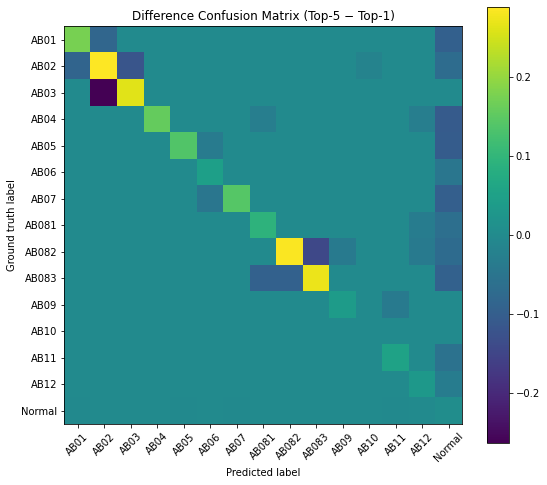

In [12]:
cm_diff = cm_top5 - cm_top1

plot_cm(
    cm_diff,
    class_names,
    "Difference Confusion Matrix (Top-5 − Top-1)"
)


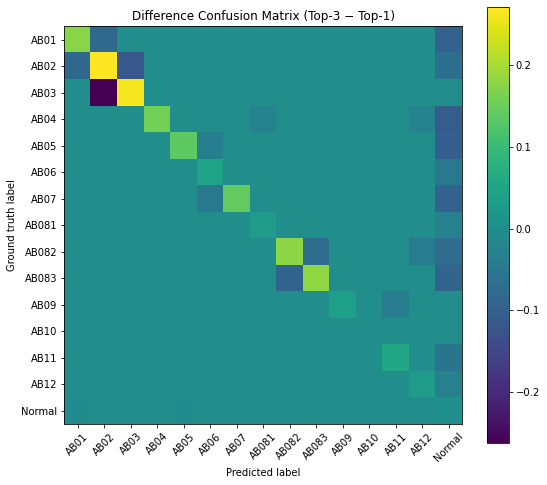

In [13]:
cm_diff = cm_top3 - cm_top1

plot_cm(
    cm_diff,
    class_names,
    "Difference Confusion Matrix (Top-3 − Top-1)"
)


## Difference CM (Top-1 → Top-k heatmap)

Concept: Difference CM คืออะไร

เราคำนวณ ΔCM=CMTop5−CMTop1

โดย

ใช้ row-normalized confusion matrix

ค่า บวก (แดง) = ดีขึ้น

ค่า ลบ (น้ำเงิน) = แย่ลง

diagonal ↑ = recall ดีขึ้นต่อ class

In [14]:
def topk_confusion_label(row, gt_col, pred_cols, k):
    gt = row[gt_col]
    preds = row[pred_cols[:k]].values.tolist()

    if gt in preds:
        return gt
    else:
        return preds[0]   # fallback = top-1


In [15]:
from sklearn.metrics import confusion_matrix
import numpy as np

def get_cm(df, gt_col, pred_cols, k, labels):
    y_true = df[gt_col]
    y_pred = df.apply(
        lambda r: topk_confusion_label(r, gt_col, pred_cols, k),
        axis=1
    )
    cm = confusion_matrix(
        y_true, y_pred,
        labels=labels,
        normalize="true"
    )
    return cm


In [16]:
labels_15AB = sorted(Results_Unlearn['Sub_class_New'].unique())

cm_top1 = get_cm(
    Results_Unlearn,
    gt_col="Sub_class_New",
    pred_cols=pred_15AB_columns_top5,
    k=1,
    labels=labels_15AB
)

cm_top5 = get_cm(
    Results_Unlearn,
    gt_col="Sub_class_New",
    pred_cols=pred_15AB_columns_top5,
    k=5,
    labels=labels_15AB
)

diff_cm = cm_top5 - cm_top1


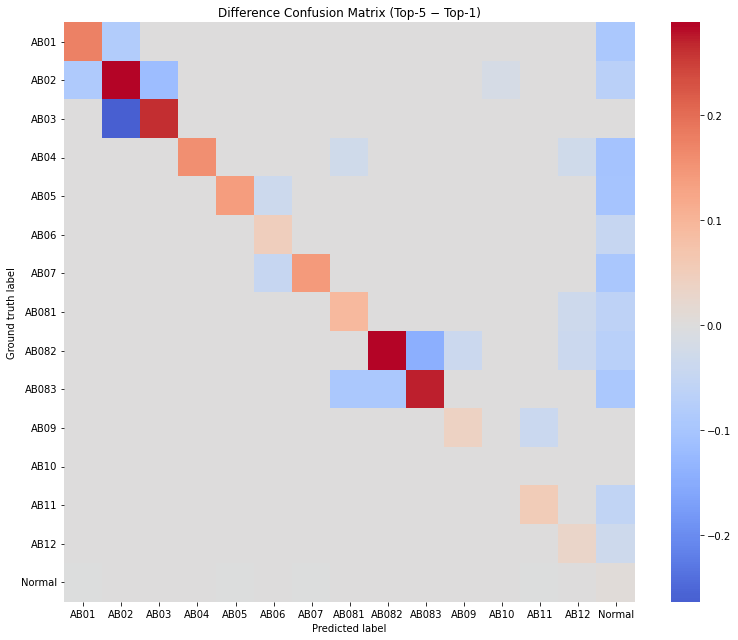

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(11,9))
sns.heatmap(
    diff_cm,
    xticklabels=labels_15AB,
    yticklabels=labels_15AB,
    cmap="coolwarm",
    center=0,
    annot=False
)
plt.xlabel("Predicted label")
plt.ylabel("Ground truth label")
plt.title("Difference Confusion Matrix (Top-5 − Top-1)")
plt.tight_layout()
plt.show()


In [18]:
import pandas as pd

recall_gain = np.diag(diff_cm)

recall_gain_df = pd.DataFrame({
    "Class": labels_15AB,
    "ΔRecall (Top5 - Top1)": recall_gain
}).sort_values("ΔRecall (Top5 - Top1)", ascending=False)

recall_gain_df


,Class,ΔRecall (Top5 - Top1)
1,AB02,0.288136
8,AB082,0.285714
9,AB083,0.272727
2,AB03,0.263158
0,AB01,0.175676
3,AB04,0.157895
6,AB07,0.142857
4,AB05,0.137931
7,AB081,0.093750
12,AB11,0.054545


1️⃣ Difference Confusion Matrix (Top-5 − Top-1)

ความหมายของกราฟนี้

สีแดง ➜ Top-5 ช่วยให้ทำนายถูก “มากขึ้น” เมื่อเทียบกับ Top-1

สีน้ำเงิน ➜ บางกรณี Top-5 แย่ลง (พบได้น้อย / มักเกิดจาก normalization)

ค่าใกล้ 0 ➜ แทบไม่เปลี่ยน

สิ่งที่เห็นชัดมาก

Diagonal สีแดงเด่นหลาย class
👉 แปลว่า Recall ต่อ class ดีขึ้นชัดเจน เมื่อใช้ Top-5

Off-diagonal ส่วนใหญ่เป็นสีจาง
👉 Top-5 ไม่ได้เพิ่ม false positive เยอะ แต่ช่วย “ดึงของที่เกือบถูก” กลับมา

Class ที่ได้ประโยชน์สูง

AB03, AB06, AB07, AB082, AB083

จากภาพ: diagonal แดงเข้ม

หมายถึง โมเดลมักทำนายถูกอยู่ในอันดับ 2–5

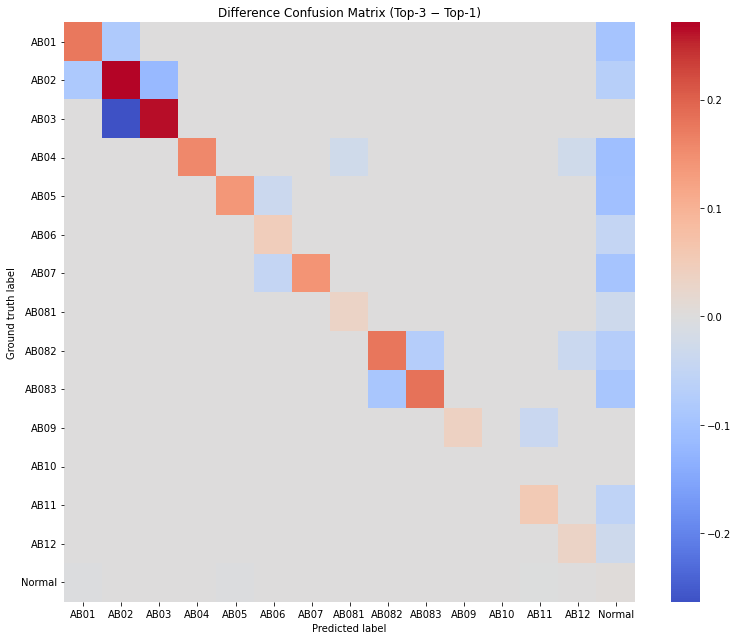

In [19]:
labels_15AB = sorted(Results_Unlearn['Sub_class_New'].unique())

cm_top1 = get_cm(
    Results_Unlearn,
    gt_col="Sub_class_New",
    pred_cols=pred_15AB_columns_top5,
    k=1,
    labels=labels_15AB
)

cm_top5 = get_cm(
    Results_Unlearn,
    gt_col="Sub_class_New",
    pred_cols=pred_15AB_columns_top5,
    k=3,
    labels=labels_15AB
)

diff_cm = cm_top5 - cm_top1
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(11,9))
sns.heatmap(
    diff_cm,
    xticklabels=labels_15AB,
    yticklabels=labels_15AB,
    cmap="coolwarm",
    center=0,
    annot=False
)
plt.xlabel("Predicted label")
plt.ylabel("Ground truth label")
plt.title("Difference Confusion Matrix (Top-3 − Top-1)")
plt.tight_layout()
plt.show()


In [20]:
import pandas as pd

recall_gain = np.diag(diff_cm)

recall_gain_df = pd.DataFrame({
    "Class": labels_15AB,
    "ΔRecall (Top5 - Top1)": recall_gain
}).sort_values("ΔRecall (Top5 - Top1)", ascending=False)

recall_gain_df

,Class,ΔRecall (Top5 - Top1)
1,AB02,0.271186
2,AB03,0.263158
9,AB083,0.181818
8,AB082,0.178571
0,AB01,0.175676
3,AB04,0.157895
6,AB07,0.142857
4,AB05,0.137931
12,AB11,0.054545
5,AB06,0.047619
